In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('/content/drive/MyDrive/PYTHON/diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_number,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.columns

Index(['encounter_id', 'patient_number', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
print(df.isnull().sum())

encounter_id                    0
patient_number                  0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [6]:
df['max_glu_serum'].fillna(df['max_glu_serum'].mode()[0], inplace=True)

<ipython-input-6-088c61886bc6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['max_glu_serum'].fillna(df['max_glu_serum'].mode()[0], inplace=True)


In [7]:
df['A1Cresult'].fillna(df['A1Cresult'].mode()[0],inplace=True)

<ipython-input-7-1792cf1bd526>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['A1Cresult'].fillna(df['A1Cresult'].mode()[0],inplace=True)


In [8]:
missing_values=df.isnull().sum()
missing_values[missing_values>0]

,0


In [9]:
categorical_cols=df.select_dtypes(include=['object']).columns
categorical_cols

Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [10]:
encoder=OneHotEncoder(handle_unknown = 'ignore',sparse_output=False)
encoded_features=encoder.fit_transform(df[categorical_cols])

In [11]:
encoded_Df=pd.DataFrame(encoded_features,columns=encoder.get_feature_names_out(categorical_cols))

In [12]:
df.drop(columns=categorical_cols,inplace=True,errors='ignore')
df=pd.concat([df,encoded_Df],axis=1)


In [13]:
df.columns

Index(['encounter_id', 'patient_number', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient',
       ...
       'metformin-rosiglitazone_Steady', 'metformin-pioglitazone_No',
       'metformin-pioglitazone_Steady', 'change_Ch', 'change_No',
       'diabetesMed_No', 'diabetesMed_Yes', 'readmitted_<30', 'readmitted_>30',
       'readmitted_NO'],
      dtype='object', length=2473)

In [14]:
def get_readmitted_category(row):
  if row['readmitted_<30'] == 1:
    return "<30"
  elif row['readmitted_>30'] == 1:
    return">30"
  else:
    return"NO"

df['readmitted']=df.apply(get_readmitted_category,axis=1)

In [15]:
df=df.drop(columns=['readmitted_<30','readmitted_>30','readmitted_NO'])

In [16]:
x=df.drop(columns=['readmitted'])
y=df['readmitted']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [19]:
y_pred = model.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score,classification_report
accuracy=accuracy_score(y_test,y_pred)
print("Model Accuracy:{accuracy:.2f}")

Model Accuracy:{accuracy:.2f}


In [21]:
print(classification_report(y_test,y_pred,target_names=y.unique()))

              precision    recall  f1-score   support

          NO       0.43      0.01      0.02      2285
         >30       0.52      0.40      0.45      7117
         <30       0.62      0.84      0.71     10952

    accuracy                           0.59     20354
   macro avg       0.52      0.42      0.39     20354
weighted avg       0.56      0.59      0.54     20354



In [22]:
readmitted_labels={0:"NO",1:">30",2:"<30"}
y_new_labels=[readmitted_labels.get(pred,pred) for pred in y_pred]

In [23]:
for i,label in enumerate(y_new_labels):
  print(f"Patient{i+1}: Readmission Status - {label}")

Patient1: Readmission Status - NO
Patient2: Readmission Status - NO
Patient3: Readmission Status - >30
Patient4: Readmission Status - >30
Patient5: Readmission Status - NO
Patient6: Readmission Status - NO
Patient7: Readmission Status - >30
Patient8: Readmission Status - >30
Patient9: Readmission Status - NO
Patient10: Readmission Status - >30
Patient11: Readmission Status - >30
Patient12: Readmission Status - NO
Patient13: Readmission Status - NO
Patient14: Readmission Status - >30
Patient15: Readmission Status - >30
Patient16: Readmission Status - NO
Patient17: Readmission Status - NO
Patient18: Readmission Status - NO
Patient19: Readmission Status - NO
Patient20: Readmission Status - NO
Patient21: Readmission Status - >30
Patient22: Readmission Status - >30
Patient23: Readmission Status - NO
Patient24: Readmission Status - NO
Patient25: Readmission Status - NO
Patient26: Readmission Status - NO
Patient27: Readmission Status - NO
Patient28: Readmission Status - NO
Patient29: Readmiss

In [24]:
import numpy as np

In [25]:
unique, counts = np.unique(y_pred,return_counts=True)
category_counts=dict(zip(unique,counts))
print("Category - wise Readmission counts:",category_counts)

Category - wise Readmission counts: {'<30': np.int64(60), '>30': np.int64(5446), 'NO': np.int64(14848)}


In [26]:
max_category = max(category_counts,key=category_counts.get)
print(f"The highest occuring readmission category is:{max_category}")

The highest occuring readmission category is:NO


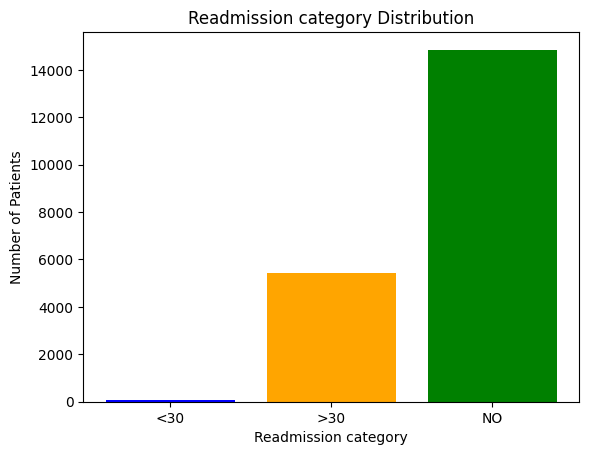

In [27]:
import matplotlib.pyplot as plt
plt.bar(category_counts.keys(),category_counts.values(),color=['blue','orange','green'])
plt.xlabel("Readmission category")
plt.ylabel("Number of Patients")
plt.title("Readmission category Distribution")
plt.show()

In [29]:
df.shape

(101766, 2471)